# OneClass SVM



## 0.환경준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

# 모델링을 위해 필요한 함수를 불러 옵니다.
from sklearn.svm import OneClassSVM # <-- One Class SVM!
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

* 모델 시각화 함수 만들기

In [7]:
def model_visualize(model, v1, v2, title = "") :
    # 메쉬그리드값 저장하기
    xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50)) # mesh grid

    # 메쉬 그리드값에 대해 모델 부터 Anomaly Score 만들기.
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Anomaly Score
    Z = Z.reshape(xx.shape)
    # 시각화
    plt.figure(figsize = (8,8))
    plt.title(title)

    # 메쉬그리드 값의 Anomaly Score에 대한 등고선
    plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

    # 데이터 산점도 그리기.(예측 결과 Abnormal은 오렌지색, Normal은 흰색)
    sns.scatterplot(x=v1, y=v2, sizes = 30,edgecolor='k', hue = pred, palette=['white', 'orange'])

    plt.axis("tight")
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.show()

## 1.One Class SVM 개념이해

> sklearn help : https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html  
One Class SVM Paper('Support Vector Method for Novelty Detection') : https://proceedings.neurips.cc/paper/1999/file/8725fb777f25776ffa9076e44fcfd776-Paper.pdf

### (1) 샘플데이터 가져오기

In [3]:
# Single Blob
X1 = pd.read_csv('Anomaly_X.csv')

# Double Blob
X2 = pd.read_csv('Anomaly_X2.csv')

#### 1) Single Blob

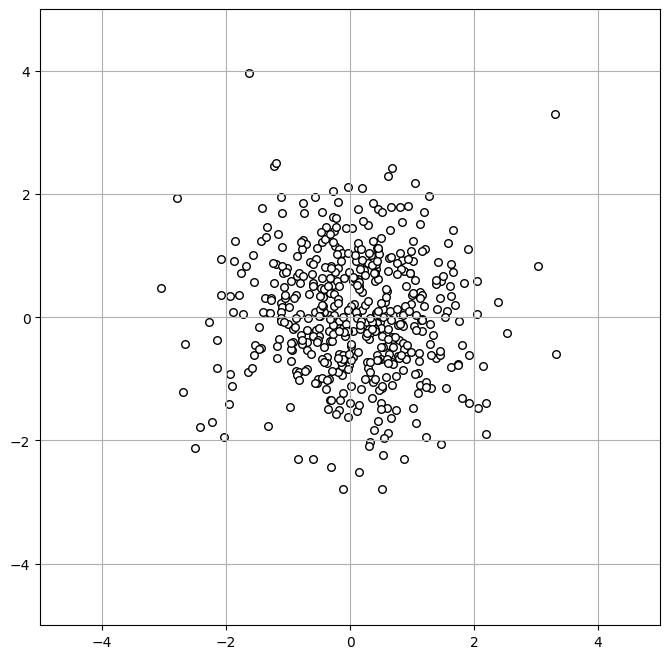

In [4]:
# sample data
plt.figure(figsize = (8,8))

plt.scatter(X1['v1'], X1['v2'], c="white", s=30, edgecolor="k")

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid()
plt.show()

* One Class SVM 모델을 일단 만들어 봅시다.

In [5]:
# 모델링
model = OneClassSVM()
model.fit(X1)
pred = model.predict(X1)
pred = np.where(pred == 1, 0, 1)

* 모델을 시각화 해 봅시다.

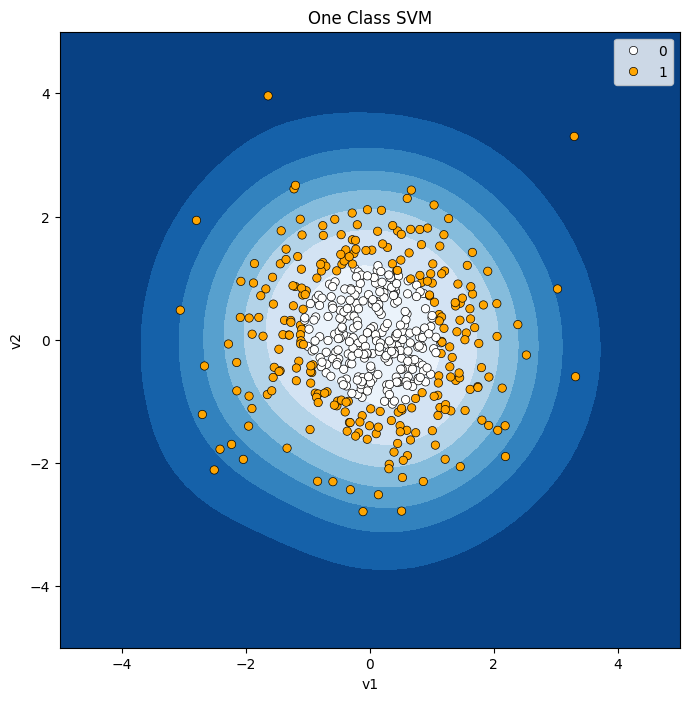

In [8]:
model_visualize(model, X1['v1'], X1['v2'], 'One Class SVM')

* 몇가지를 조절해 봅시다.
    * nu
        * 서포트벡터의 최소비율
        * 값이 클수록 Specialize, 값이 작을수록 모델이 Generalize
    * gamma
        * 곡률에 영향을 주는 데이터포인트 범위
        * 클수록 specialize, 작을수록 generalize

In [9]:
# 리스트 값의 조합을 쉽게 만들어 주는 함수
from itertools import product
nu = [0.05, 0.3, 0.6]
gamma = [0.1, 1, 5]
items = [nu, gamma]
params = list(product(*items))
params

[(0.05, 0.1),
 (0.05, 1),
 (0.05, 5),
 (0.3, 0.1),
 (0.3, 1),
 (0.3, 5),
 (0.6, 0.1),
 (0.6, 1),
 (0.6, 5)]

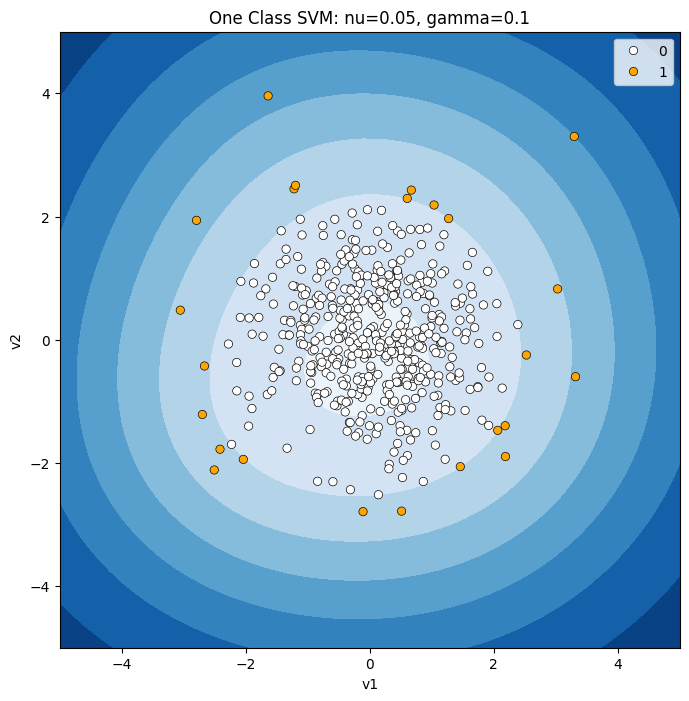

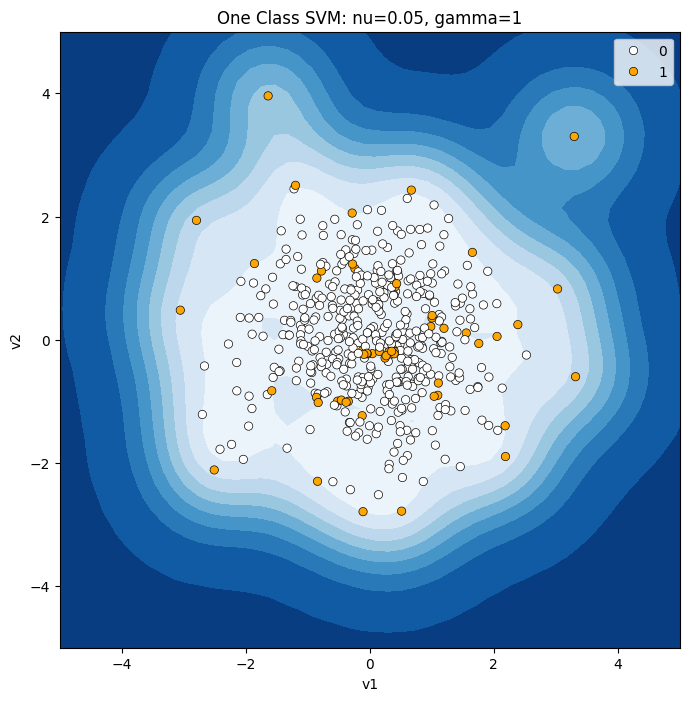

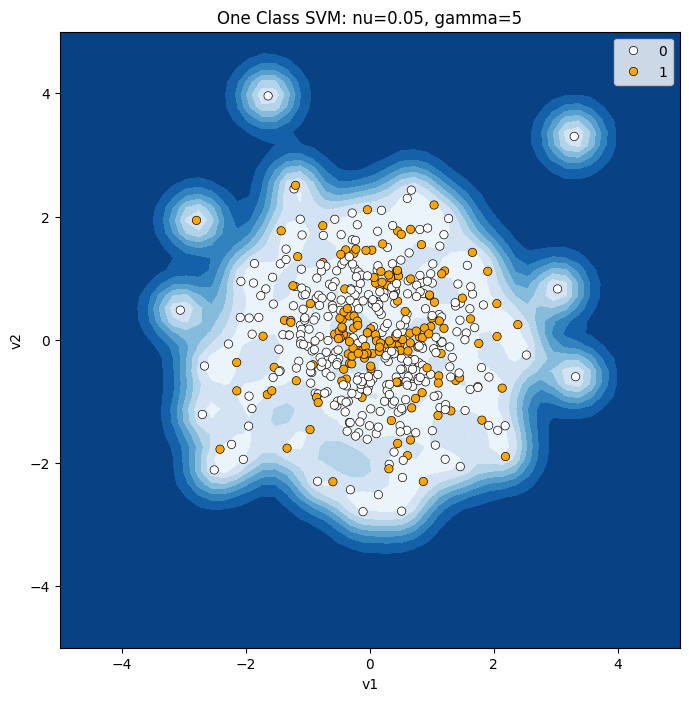

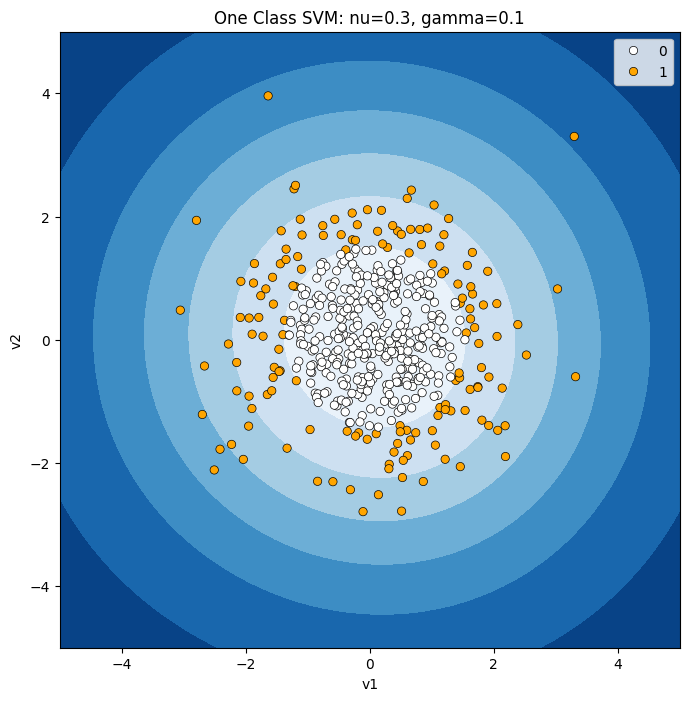

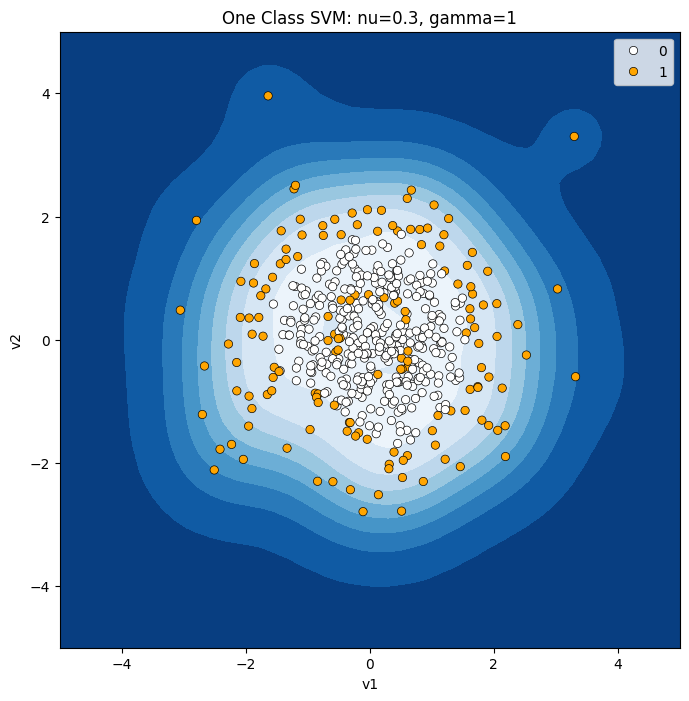

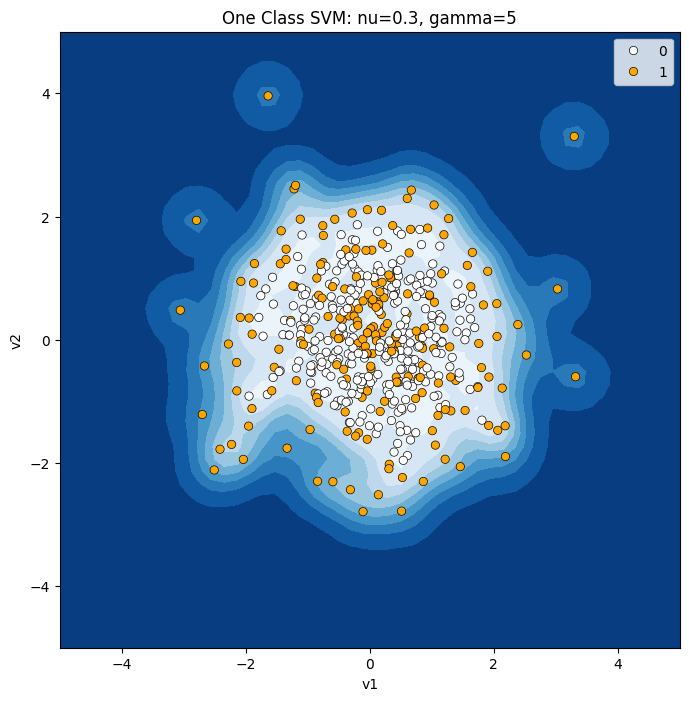

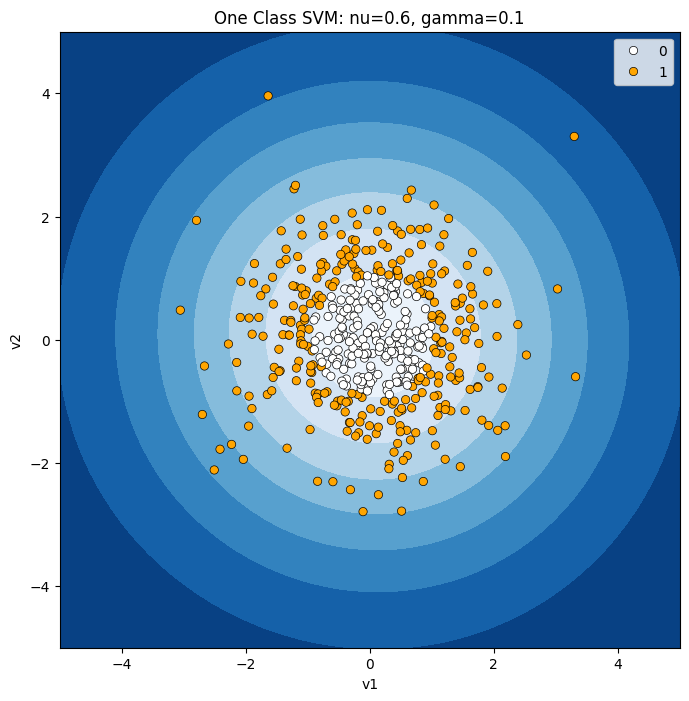

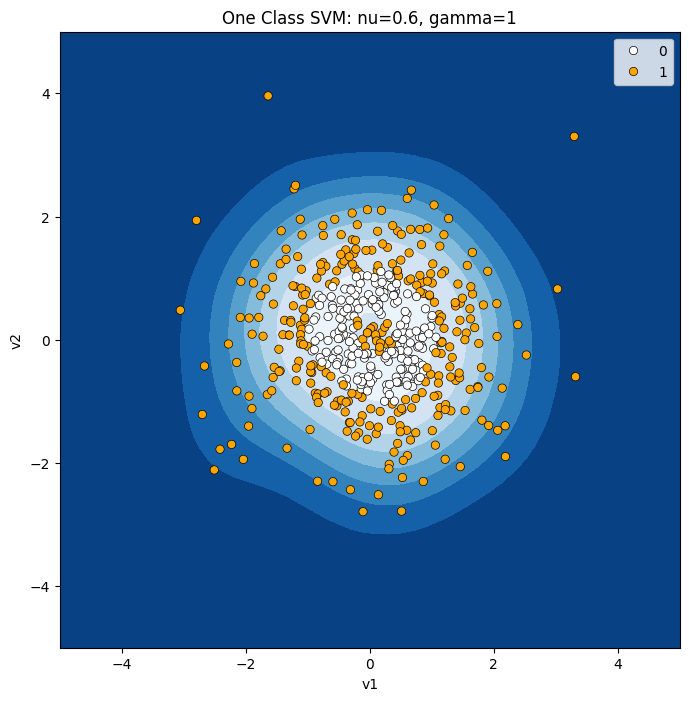

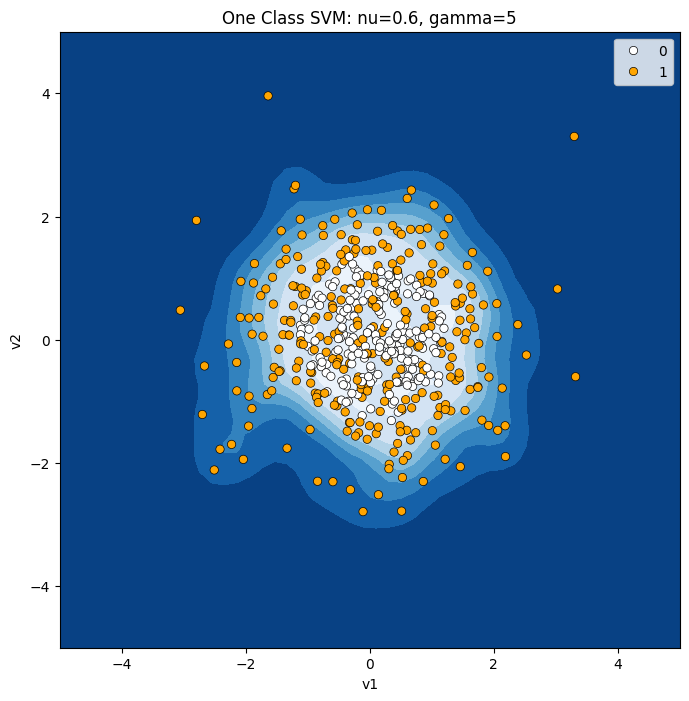

In [10]:
# 반복문으로 값의 조합에 대해 모델을 시각화 해 봅시다.
for p in params :
    # 모델링
    model = OneClassSVM(nu = p[0], gamma = p[1])
    model.fit(X1)
    pred = model.predict(X1)
    pred = np.where(pred == 1, 0, 1)

    model_visualize(model, X1['v1'], X1['v2'], 'One Class SVM:'+' nu='+str(p[0])+', gamma='+str(p[1]))

#### 2) Double Blob

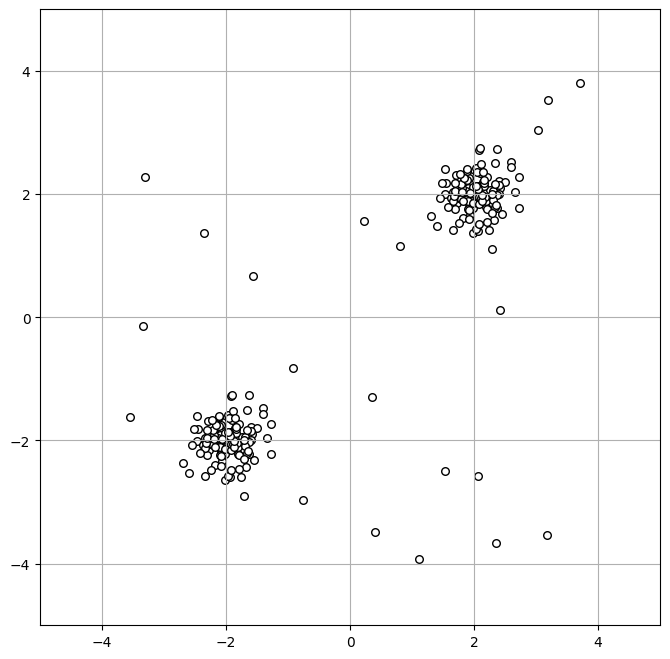

In [11]:
plt.figure(figsize = (8,8))

plt.scatter(X2['v1'], X2['v2'], c="white", s=30, edgecolor="k")

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid()
plt.show()

* One Class SVM 모델을 일단 만들어 봅시다.

In [12]:
# 모델링
model = OneClassSVM()
model.fit(X2)
pred = model.predict(X2)
pred = np.where(pred == 1, 0, 1)

* 모델을 시각화 해 봅시다.

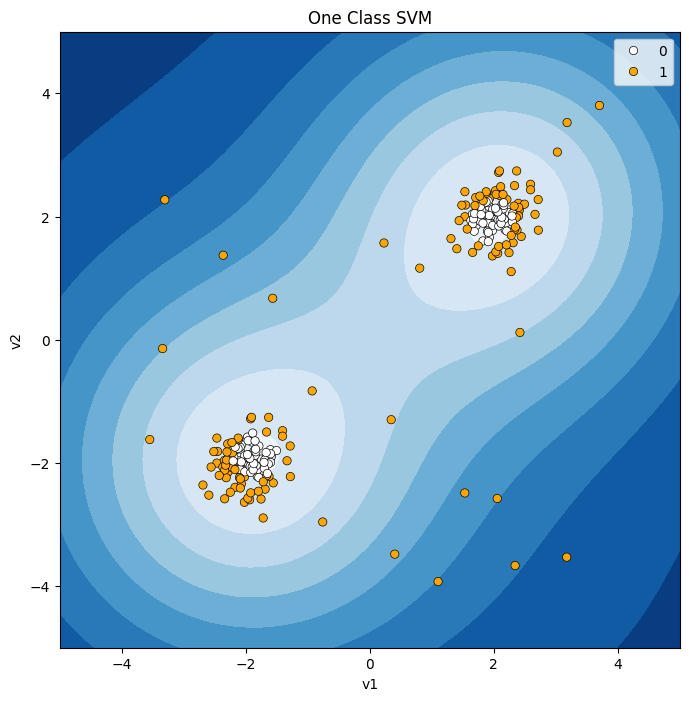

In [13]:
model_visualize(model, X2['v1'], X2['v2'], 'One Class SVM')

* 몇가지를 조절해 봅시다.
    * nu
        * 서포트벡터의 최소비율
        * 값이 클수록 Specialize, 값이 작을수록 모델이 Generalize
    * gamma
        * 곡률에 영향을 주는 데이터포인트 범위
        * 클수록 specialize, 작을수록 generalize

In [14]:
# 리스트 값의 조합을 쉽게 만들어 주는 함수
from itertools import product
nu = [0.05, 0.3, 0.6]
gamma = [0.1, 1, 5]
items = [nu, gamma]
params = list(product(*items))
params

[(0.05, 0.1),
 (0.05, 1),
 (0.05, 5),
 (0.3, 0.1),
 (0.3, 1),
 (0.3, 5),
 (0.6, 0.1),
 (0.6, 1),
 (0.6, 5)]

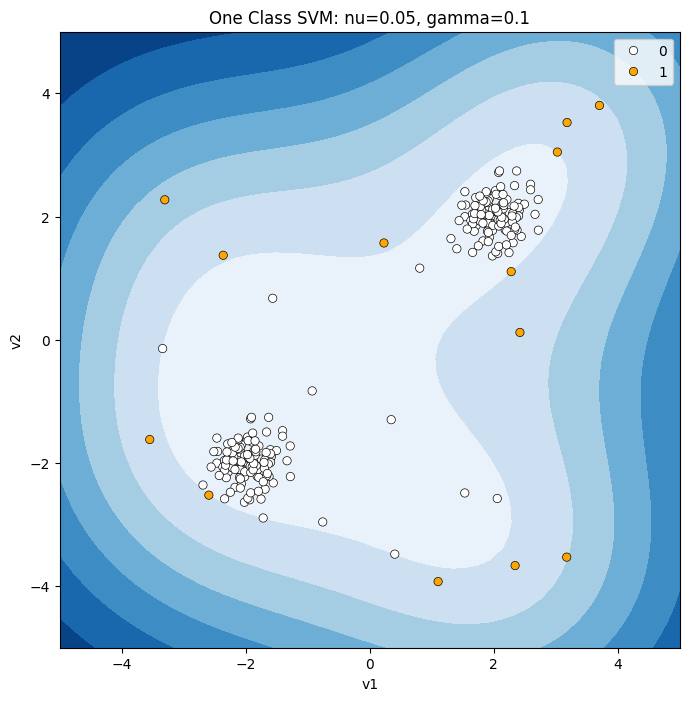

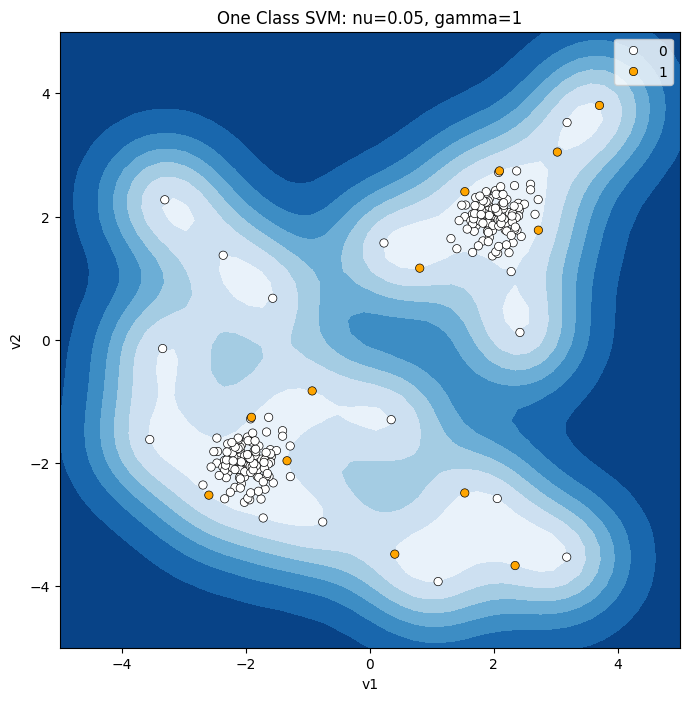

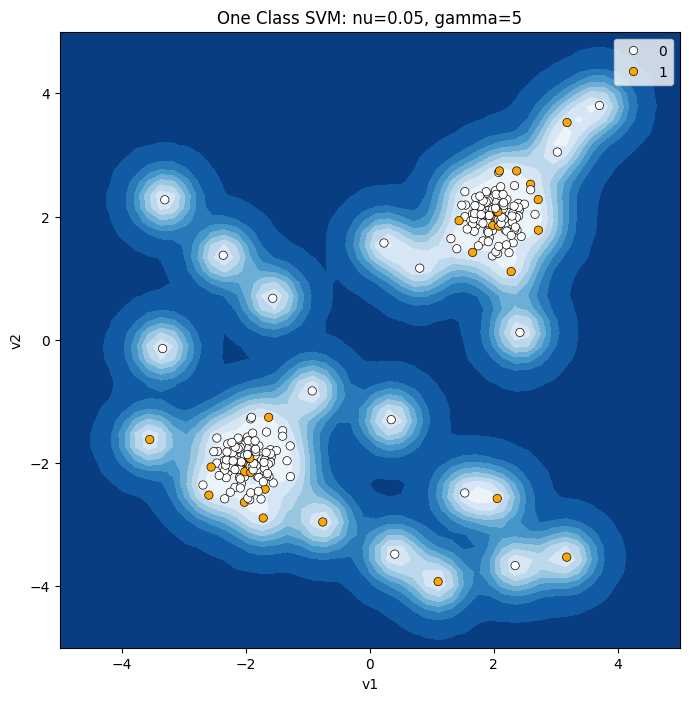

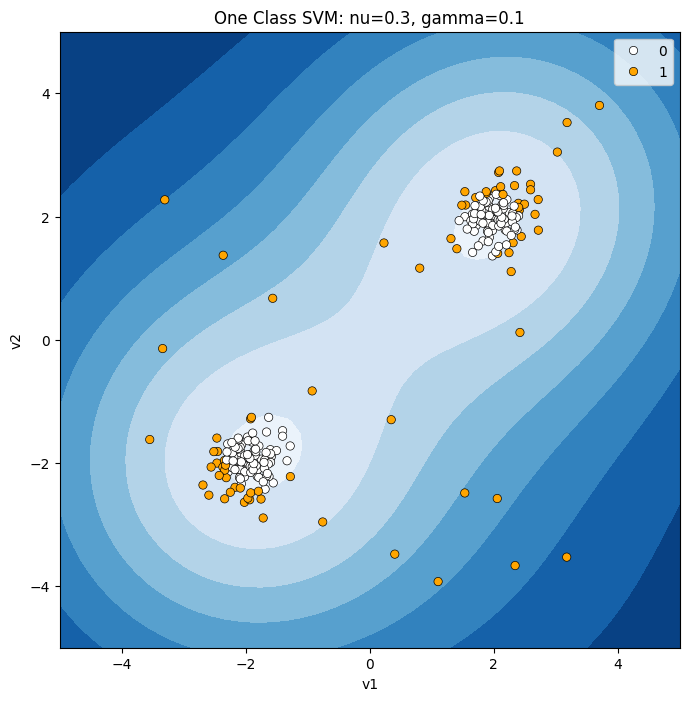

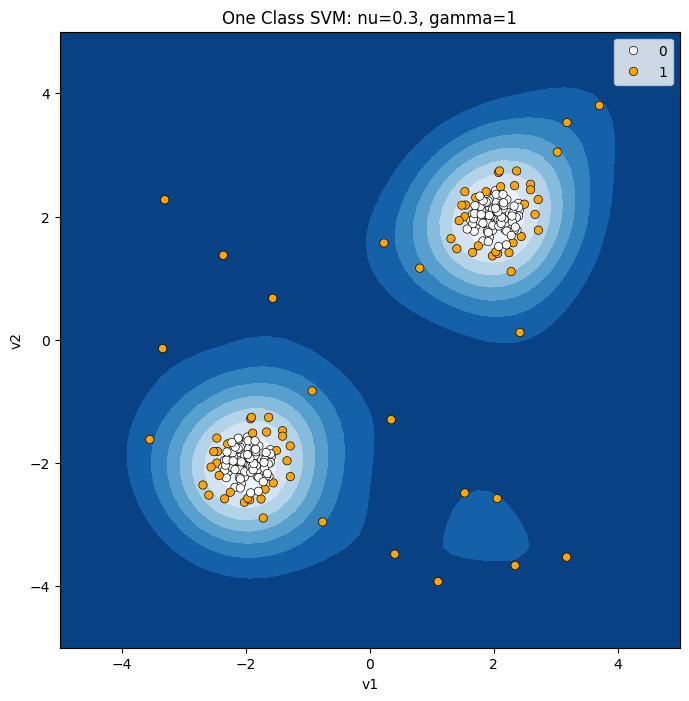

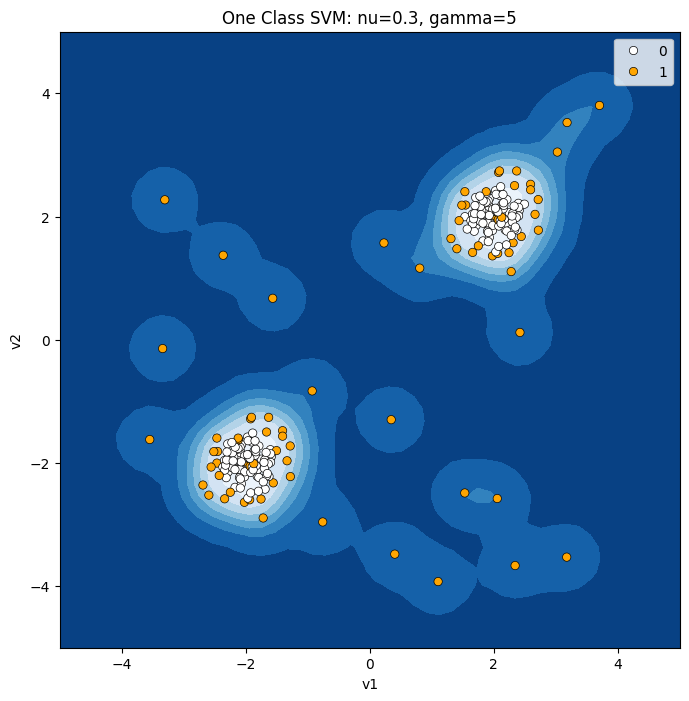

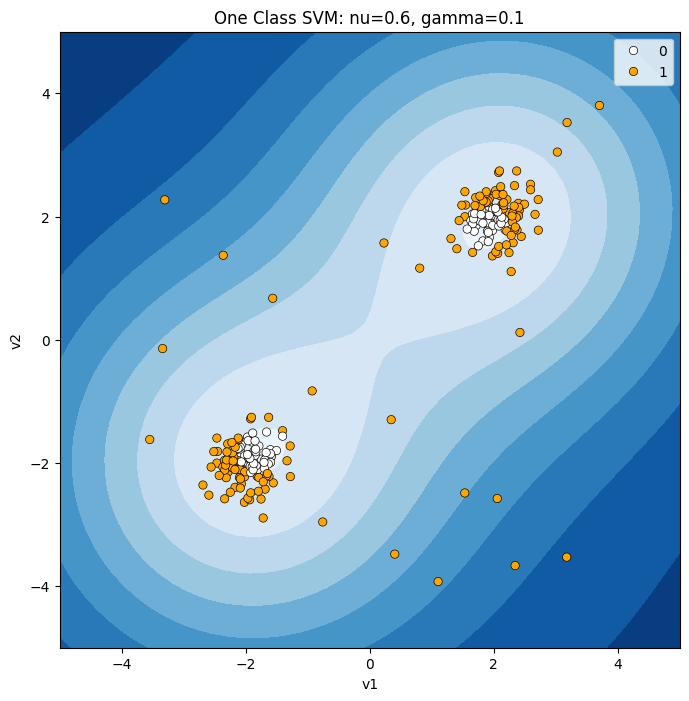

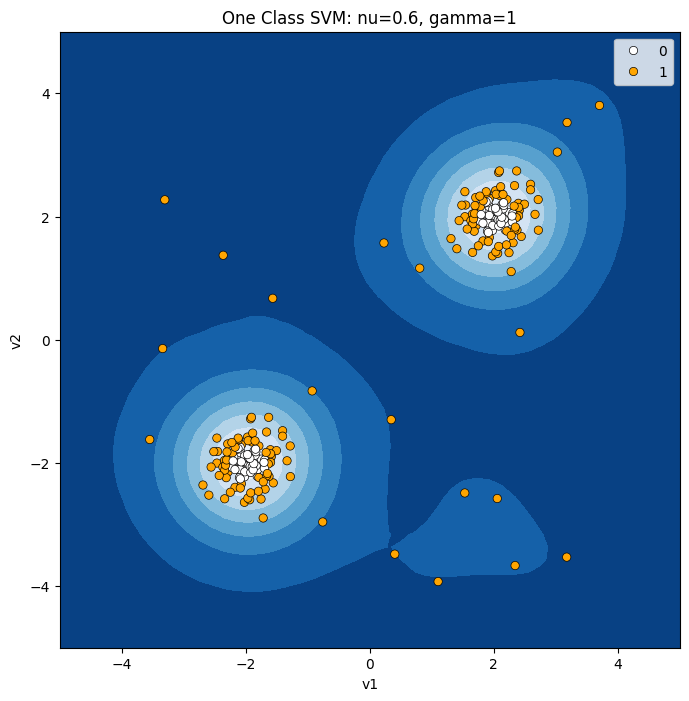

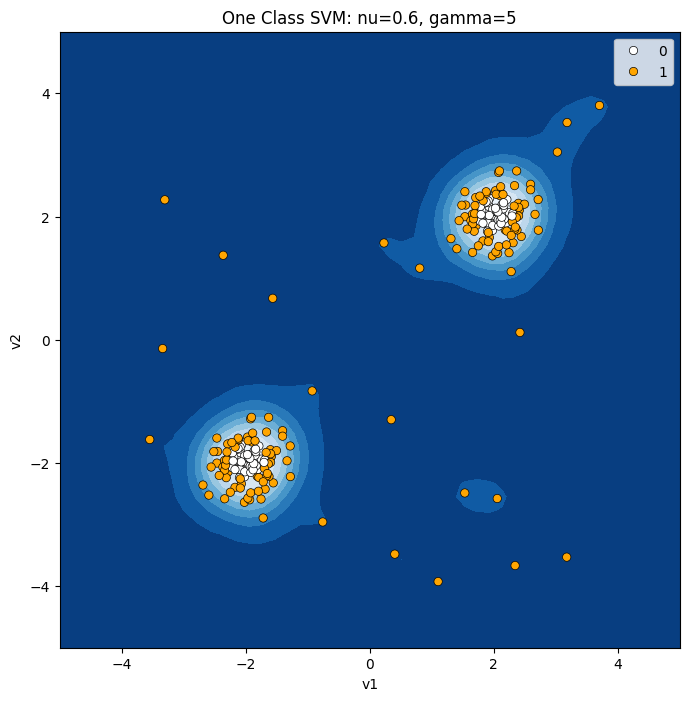

In [15]:
# 반복문으로 값의 조합에 대해 모델을 시각화 해 봅시다.
for p in params :
    # 모델링
    model = OneClassSVM(nu = p[0], gamma = p[1])
    model.fit(X2)
    pred = model.predict(X2)
    pred = np.where(pred == 1, 0, 1)

    model_visualize(model, X2['v1'], X2['v2'], 'One Class SVM:'+' nu='+str(p[0])+', gamma='+str(p[1]))

## 2.예제 : Semiconductor manufacturing process dataset


### (1) 데이터 준비

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

# 모델링을 위해 필요한 함수를 불러 옵니다.
from sklearn.svm import OneClassSVM # <-- One Class SVM!
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

* 데이터 로딩

In [17]:
path = "secom_9.csv"
data = pd.read_csv(path)

data['label'] = 0
data.loc[data['defeat']== 'defeat', 'label']= 1
data.drop(['datetime','defeat'], axis = 1, inplace=True)
data.head()

,v021,v087,v088,v089,v114,v115,v116,v117,v118,v120,...,v528,v571,v572,v573,v574,v575,v576,v577,v578,label
0,1.4026,2.3895,0.9690,1747.6049,0.9460,0.0,748.6115,0.9908,58.4306,0.9804,...,6.6926,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,0
1,1.3825,2.3754,0.9894,1931.6464,0.9425,0.0,731.2517,0.9902,58.6680,0.9731,...,8.8370,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0
2,1.4123,2.4532,0.9880,1685.8514,0.9231,0.0,718.5777,0.9899,58.4808,0.9772,...,6.4568,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,1
3,1.4011,2.4004,0.9904,1752.0968,0.9564,0.0,709.0867,0.9906,58.6635,0.9761,...,6.4865,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0
4,1.3888,2.4530,0.9902,1828.3846,0.9424,0.0,796.5950,0.9908,58.3858,0.9628,...,6.3745,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,0


변수 정보
* label : 1 - 불량, 0 - 정상
* v### : 센서값들


In [18]:
target = 'label'

In [19]:
data[target].value_counts() / data.shape[0]

label
0    0.933631
1    0.066369
Name: count, dtype: float64

* x, y로 나누기

In [20]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* 가변수화 Dummy Variable

* 데이터 분할
    * 이미 test set은 분할되어 있다고 가정합니다.
    * 주어진 데이터를 train set : validation set 으로 분할

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# train_val에서 train : val = 8 : 2
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 10)

In [23]:
print(x_train.shape, x_val.shape)

(1253, 52) (314, 52)


* 스케일링(Optional)
    * 스케일링을 필요로 하는 알고리즘이 있습니다.
    * SVM은 스케일링을 필요로 합니다.

In [24]:
scaler = MinMaxScaler()

x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

* 학습용 데이터 준비

In [25]:
x_train0 = x_train_s[y_train == 0]

### (2) 모델링

#### 1) 기본값으로 모델링

In [26]:
model = OneClassSVM()
model.fit(x_train0)
pred = model.predict(x_val_s)
pred = np.where(pred == 1, 0, 1)

print(confusion_matrix(y_val, pred))
print('-'*50)
print(classification_report(y_val, pred))

[[145 148]
 [  8  13]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.49      0.65       293
           1       0.08      0.62      0.14        21

    accuracy                           0.50       314
   macro avg       0.51      0.56      0.40       314
weighted avg       0.89      0.50      0.62       314



#### 2) nu 값을 조절하면서 f1 score를 비교해 봅시다.

In [28]:
params = np.linspace(0.001,0.999,50)
f1 = []

for nu in params :
    model = OneClassSVM(nu=nu)
    model.fit(x_train0)
    pred = model.predict(x_val_s)
    pred = np.where(pred == 1, 0, 1)
    f1.append(f1_score(y_val, pred, pos_label= 1))

In [29]:
nu_f1_max = params[np.argmax(f1)]
nu_f1_max

0.48981632653061224

nu : 0.48981632653061224, f1_max : 0.14285714285714285


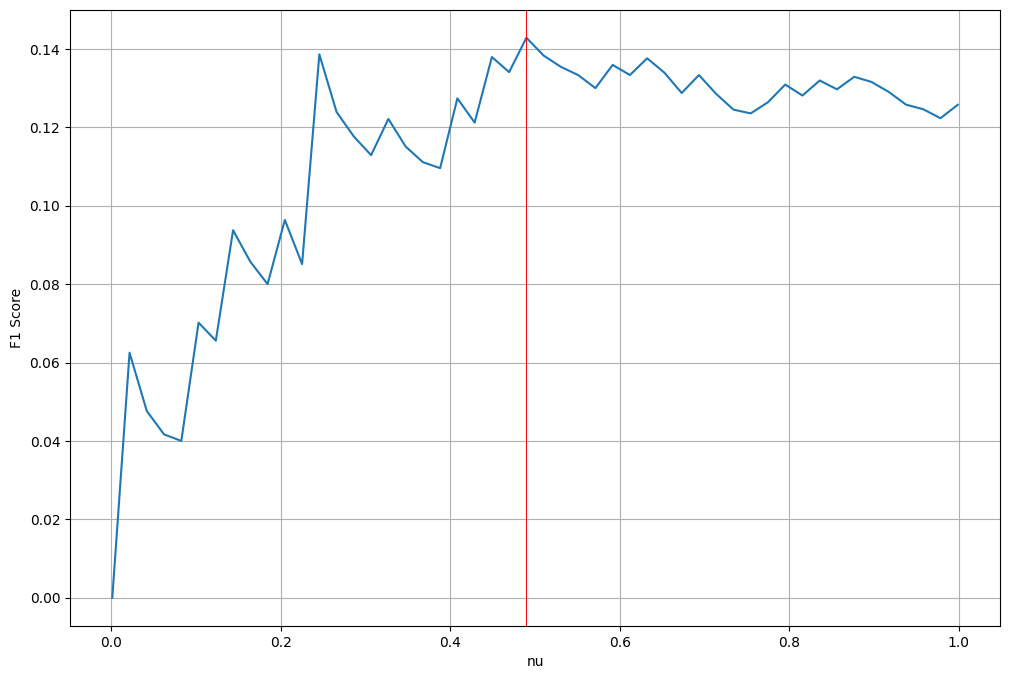

In [30]:
print( f'nu : {nu_f1_max}, f1_max : {max(f1)}')

plt.figure(figsize=(12, 8))
plt.plot(params, f1)
plt.axvline(nu_f1_max, color = 'r', linewidth = .7   )
plt.ylabel('F1 Score')
plt.xlabel('nu')
plt.grid()
plt.show()

#### 3) gamma값을 조절하면서 f1 score를 비교해 봅시다.

In [31]:
params = np.linspace(0.1,10,20)
f1 = []

for g in params :
    model = OneClassSVM(nu=0.49, gamma = g)
    model.fit(x_train0)
    pred = model.predict(x_val_s)
    pred = np.where(pred == 1, 0, 1)
    f1.append(f1_score(y_val, pred, pos_label= 1))

In [32]:
ga_f1_max = params[np.argmax(f1)]
ga_f1_max

4.7894736842105265

nu : 4.7894736842105265, f1_max : 0.1497326203208556


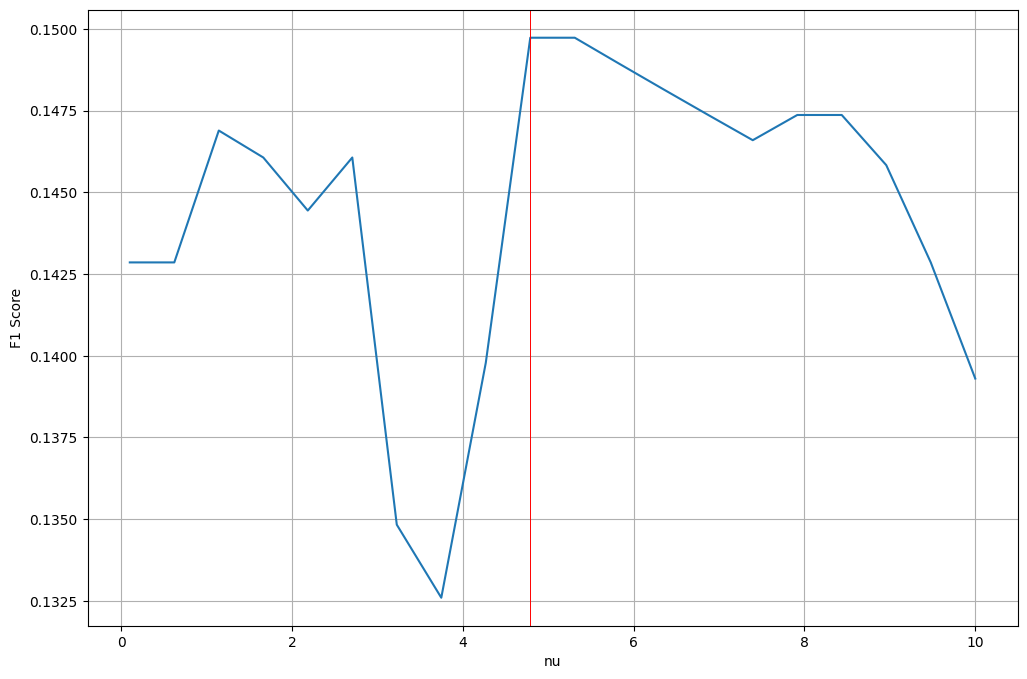

In [33]:
print( f'nu : {ga_f1_max}, f1_max : {max(f1)}')

plt.figure(figsize=(12, 8))
plt.plot(params, f1)
plt.axvline(ga_f1_max, color = 'r', linewidth = .7   )
plt.ylabel('F1 Score')
plt.xlabel('gamma')
plt.grid()
plt.show()

## 3.실습 : 고객이탈 예측

### (1) 데이터 준비

* 데이터 로딩

In [34]:
path = "mobile_class_imbalance.csv"
data = pd.read_csv(path)

target = 'CHURN'
x = data.drop(target, axis = 1)
y = data.loc[:,target]

In [35]:
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,145297,71,37,969515,478,4,1,avg,very_little,no,0
1,0,115956,0,11,899704,710,0,5,unsat,very_high,actively_looking_into_it,0
2,0,40683,212,15,844664,188,24,5,very_unsat,very_little,no,0
3,1,33043,0,81,539732,162,1,1,unsat,very_little,never_thought,0
4,1,50743,0,22,430005,318,16,5,unsat,very_high,actively_looking_into_it,0


In [36]:
y.value_counts() / y.shape[0]

CHURN
0    0.971286
1    0.028714
Name: count, dtype: float64

* 가변수화

In [37]:
cat = ['REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']

for v in cat :
    dumm = pd.get_dummies(x[v], prefix=v, drop_first=True)
    x = pd.concat([x, dumm], axis=1)
    x.drop(v, axis=1, inplace = True)

* 데이터 분할

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 2000, random_state=2021)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 2000, random_state=2021)

* 스케일링(Optional)
    * 스케일링을 필요로 하는 알고리즘이 있습니다.
    * SVM은 스케일링을 필요로 합니다.

In [39]:
scaler = MinMaxScaler()

x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

* 학습용 데이터 준비

In [40]:
x_train0 = x_train_s[y_train == 0]

### (2) 모델링1
* 학습을 위한 데이터 준비(Normal Data만 준비)
* One Class SVM 을 이용하여 모델링을 수행해 봅시다. (기본값으로 생성)

In [41]:
model = OneClassSVM()
model.fit(x_train0)
pred = model.predict(x_val_s)
pred = np.where(pred == 1, 0, 1)

print(confusion_matrix(y_val, pred))
print('-'*50)
print(classification_report(y_val, pred))

[[980 969]
 [ 18  33]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.50      0.67      1949
           1       0.03      0.65      0.06        51

    accuracy                           0.51      2000
   macro avg       0.51      0.57      0.36      2000
weighted avg       0.96      0.51      0.65      2000



### (3) 모델링2
* nu 값을 조정하면서 f1 score를 비교해 봅시다.

In [43]:
params = np.linspace(0.001,0.999,50)
f1 = []

for nu in params :
    model = OneClassSVM(nu=nu)
    model.fit(x_train0)
    pred = model.predict(x_val_s)
    pred = np.where(pred == 1, 0, 1)
    f1.append(f1_score(y_val, pred, pos_label= 1))

In [44]:
nu_f1_max = params[np.argmax(f1)]
nu_f1_max

0.08246938775510204

nu : 0.08246938775510204, f1_max : 0.11483253588516745


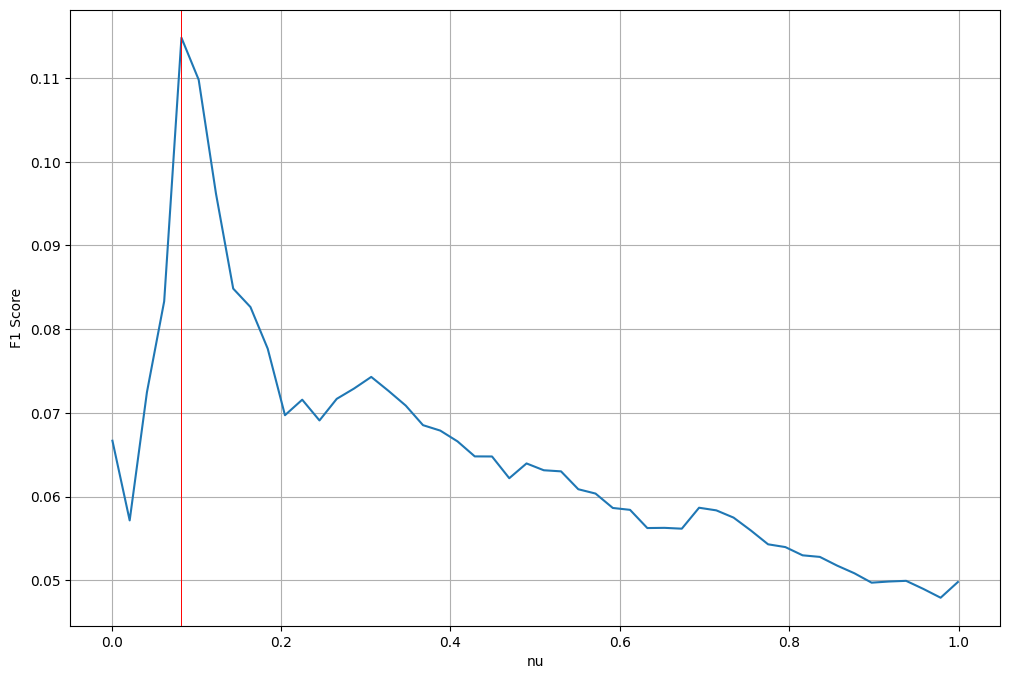

In [45]:
print( f'nu : {nu_f1_max}, f1_max : {max(f1)}')

plt.figure(figsize=(12, 8))
plt.plot(params, f1)
plt.axvline(nu_f1_max, color = 'r', linewidth = .7   )
plt.ylabel('F1 Score')
plt.xlabel('nu')
plt.grid()
plt.show()

* gamma값을 조절하면서 f1 score를 비교해 봅시다.

In [46]:
params = np.linspace(0.1,10,20)
f1 = []

for g in params :
    model = OneClassSVM(nu=0.082, gamma = g)
    model.fit(x_train0)
    pred = model.predict(x_val_s)
    pred = np.where(pred == 1, 0, 1)
    f1.append(f1_score(y_val, pred, pos_label= 1))

In [47]:
ga_f1_max = params[np.argmax(f1)]
ga_f1_max

0.1

gamma : 0.1, f1_max : 0.10891089108910891


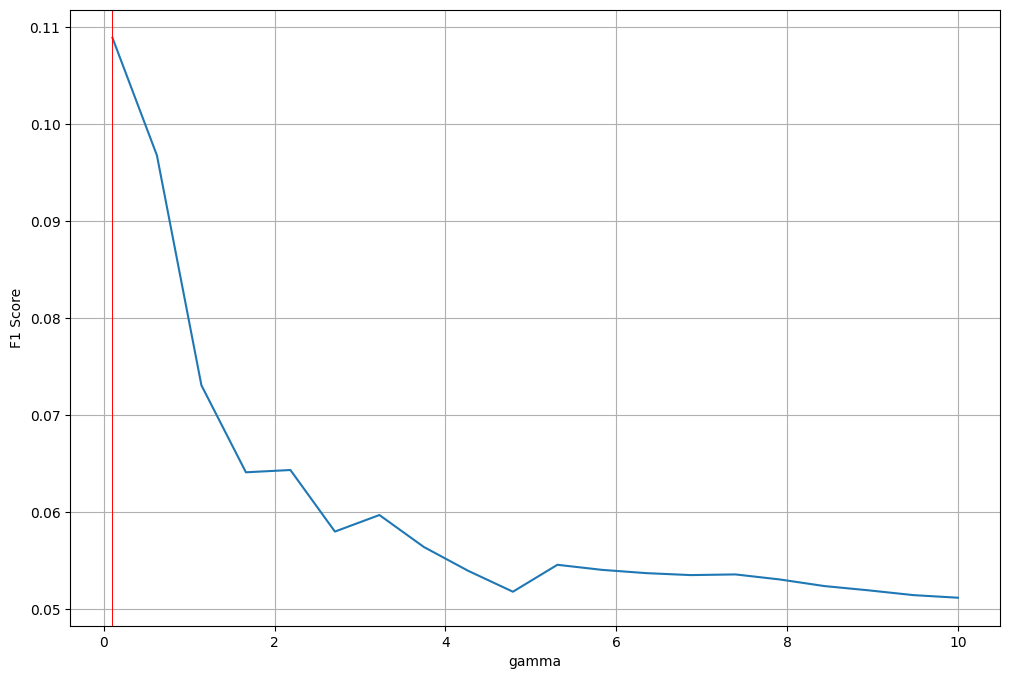

In [48]:
print( f'gamma : {ga_f1_max}, f1_max : {max(f1)}')

plt.figure(figsize=(12, 8))
plt.plot(params, f1)
plt.axvline(ga_f1_max, color = 'r', linewidth = .7   )
plt.ylabel('F1 Score')
plt.xlabel('gamma')
plt.grid()
plt.show()